# Cross-correlation for magnetic data

**This notebook shows the use of the cross-correlation coefficient techniqe for magnetic data. This technique was used by several research groups$^*$ in order to estimate the magnetization direction and another signals that also depend on this vector, although not very changeable or influential by this vector.**

**The simple cross-correlation coeficient is given by:**
# $$ C = \dfrac{\sum(F - \bar{F})(G - \bar{G})}
{\sqrt{\sum(F - \bar{F})^2 \sum(G - \bar{G})^2}} $$ 
**where $F$ and $G$ represent the two magnetic data, firs derivative and horizontal gradient, for example; and $\bar{F}$ and $\bar{G}$ represent the mean for the two data sets.**

### *Some researches: 
* Fedi, M., Florio, G., & Rapolla, A. (1994). A method to estimate the total magnetization direction from a distortion analysis of magnetic anomalies. Geophysical Prospecting, 42(3), 261-274. Doi: [10.1111/j.1365-2478.1994.tb00209.x/abstract](http://onlinelibrary.wiley.com/doi/10.1111/j.1365-2478.1994.tb00209.x/abstract)

* Dannemiller, N., & Li, Y. (2006). A new method for determination of magnetization direction. Geophysics, 71(6), L69-L73. Doi: [10.1190/1.2356116](http://library.seg.org/Doi/10.1190/1.2356116)

* Gerovska, D., Araúzo‐Bravo, M. J., & Stavrev, P. (2009). Estimating the magnetization direction of sources from southeast Bulgaria through correlation between reduced‐to‐the‐pole and total magnitude anomalies. Geophysical Prospecting, 57(4), 491-505. Doi: [10.1111/j.1365-2478.2008.00761.x](http://onlinelibrary.wiley.com/doi/10.1111/j.1365-2478.2008.00761.x/full)

In [1]:
# Importing all usefull libraries for this notebook
import numpy as np
import matplotlib.pyplot as plt

### Simple example for the cross correlation coeffiecient

In [2]:
# Defines number of points
n = 150
# Define the three vectors along all directions
x = np.linspace(-1500, 1500, n)
y = x
z = -50.
# Creates the grid
X, Y = np.meshgrid(x, y)

In [3]:
# Define the elements of the prims for gravity and magnetic computation
modelmag = (-400., 400., -400., 400., 100., 500., 1.50)
area = modelmag[:4]
field = (66., -33.)
source = (25., 49.)

### Computing: (i) gravity anomaly; (ii) total field anomaly; (iii) total field anomaly in magnetic pole; and (iv) reduction to pole.

In [4]:
from codes.prism import prism_tf
from codes.plot import draw_prism

In [5]:
from codes.statistical import analysis
from codes.auxiliars import addnoise

In [6]:
# Computes the magnetic data
tf_r = prism_tf(X, Y, z, modelmag, source, field)
tf_i = prism_tf(X, Y, z, modelmag, field, field)

In [7]:
# Verifying the values
_ = analysis(tf_r)
print
_ = analysis(tf_i)

Minimum:    -163.8983
Maximum:    329.3151
Mean value: 5.4107
Variation:  493.2134

Minimum:    -108.7448
Maximum:    425.1800
Mean value: 11.2865
Variation:  533.9248


In [8]:
# Add noise to the data
tf_r = addnoise(tf_r, 5., 0.2)
tf_i = addnoise(tf_i, 10., 0.2)

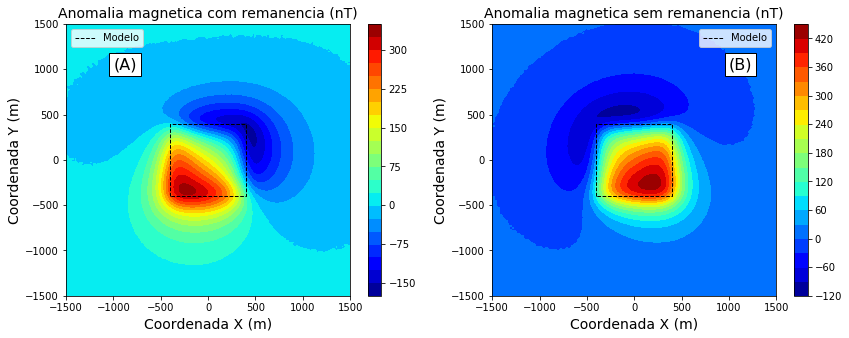

In [9]:
plt.figure(figsize=(14, 5))
plt.subplot(1, 2, 1)
plt.contourf(Y, X, tf_r, 20, cmap = plt.cm.jet)
draw_prism(area, 'k--', linewidth = 1, label = 'Modelo', xy2ne = True)
plt.text(-1000., 1000., '(A)', fontsize = 16, bbox = dict(facecolor = 'white', alpha = 1))
plt.title('Anomalia magnetica com remanencia (nT)', fontsize = 14)
plt.xlabel('Coordenada X (m)', fontsize = 14)
plt.ylabel('Coordenada Y (m)', fontsize = 14)
plt.legend(loc = 2)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.contourf(Y, X, tf_i, 20, cmap = plt.cm.jet)
draw_prism(area, 'k--', linewidth = 1, label = 'Modelo', xy2ne = True)
plt.text(1000., 1000., '(B)', fontsize = 16, bbox = dict(facecolor = 'white', alpha = 1.))
plt.title('Anomalia magnetica sem remanencia (nT)', fontsize = 14)
plt.xlabel('Coordenada X (m)', fontsize = 14)
plt.ylabel('Coordenada Y (m)', fontsize = 14)
plt.legend(loc = 'best')
plt.colorbar()

plt.savefig('figures/modelmag.png', dpi = 300)

plt.show()

In [10]:
from codes.filtering import reduction, pseudograv
from codes.derivative import totalgrad, horzgrad

In [11]:
# Computes the RTP data
rtp_r = reduction(x, y, tf_r, field, source, (90., 0.), (90., 0))
rtp_i = reduction(x, y, tf_i, field, field, (90., 0.), (90., 0))

codes/auxiliars.py:190: RuntimeWarning: invalid value encountered in divide
  theta = z + ((x*u + y*v)/k)*1j


In [12]:
# Computes pseudogravity anomaly (remanent)
ps_r = pseudograv(x, y, rtp_r, (90., 0.), (90., 0.), 1000., 1.5)
ps_i = pseudograv(x, y, rtp_i, (90., 0.), (90., 0.), 1000., 1.5)

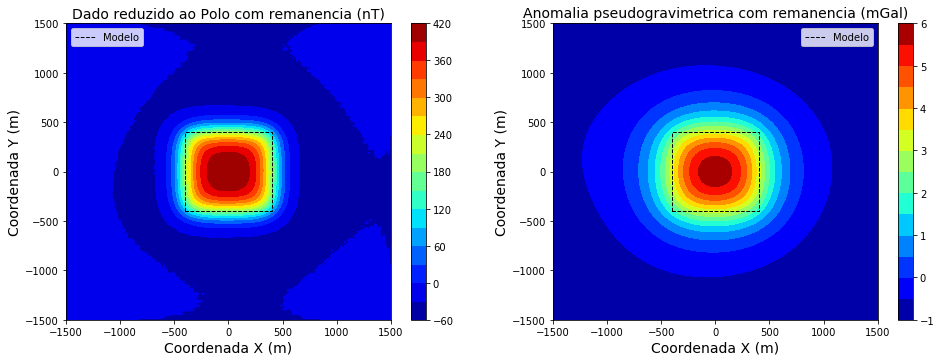

In [13]:
plt.close('all')
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
plt.contourf(Y, X, rtp_r, 15, cmap = plt.cm.jet)
draw_prism(area, 'k--', linewidth = 1, label = 'Modelo', xy2ne = True)
#plt.text(-1000., 1000., '(A)', fontsize = 16, bbox = dict(facecolor = 'white', alpha = 1))
plt.title('Dado reduzido ao Polo com remanencia (nT)', fontsize = 14)
plt.xlabel('Coordenada X (m)', fontsize = 14)
plt.ylabel('Coordenada Y (m)', fontsize = 14)
plt.legend(loc = 2)
plt.colorbar()

plt.subplot(2, 2, 2)
plt.contourf(Y, X, ps_r, 15, cmap = plt.cm.jet)
draw_prism(area, 'k--', linewidth = 1, label = 'Modelo', xy2ne = True)
#plt.text(1000., 1000., '(B)', fontsize = 16, bbox = dict(facecolor = 'white', alpha = 1.))
plt.title('Anomalia pseudogravimetrica com remanencia (mGal)', fontsize = 14)
plt.xlabel('Coordenada X (m)', fontsize = 14)
plt.ylabel('Coordenada Y (m)', fontsize = 14)
plt.legend(loc = 'best')
plt.colorbar()

plt.savefig('figures/rtp_pseudo_1.png', dpi = 300)

plt.show()

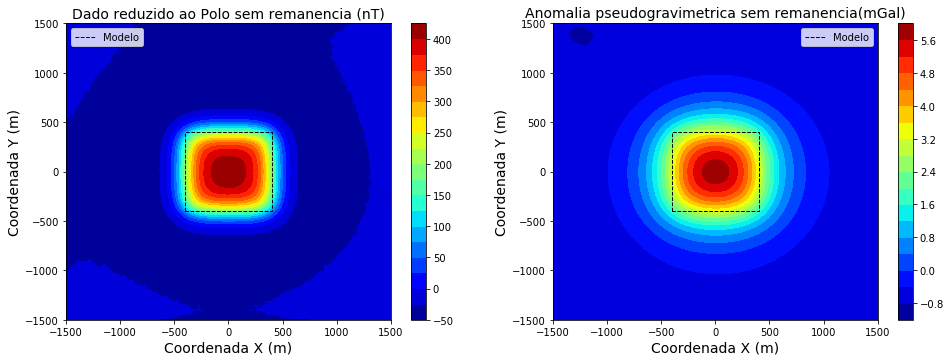

In [14]:
plt.close('all')
plt.figure(figsize=(16, 12))

plt.subplot(2, 2, 1)
plt.contourf(Y, X, rtp_i, 15, cmap = plt.cm.jet)
draw_prism(area, 'k--', linewidth = 1, label = 'Modelo', xy2ne = True)
#plt.text(-1000., 1000., '(A)', fontsize = 16, bbox = dict(facecolor = 'white', alpha = 1))
plt.title('Dado reduzido ao Polo sem remanencia (nT)', fontsize = 14)
plt.xlabel('Coordenada X (m)', fontsize = 14)
plt.ylabel('Coordenada Y (m)', fontsize = 14)
plt.legend(loc = 2)
plt.colorbar()

plt.subplot(2, 2, 2)
plt.contourf(Y, X, ps_i, 15, cmap = plt.cm.jet)
draw_prism(area, 'k--', linewidth = 1, label = 'Modelo', xy2ne = True)
#plt.text(1000., 1000., '(B)', fontsize = 16, bbox = dict(facecolor = 'white', alpha = 1.))
plt.title('Anomalia pseudogravimetrica sem remanencia(mGal)', fontsize = 14)
plt.xlabel('Coordenada X (m)', fontsize = 14)
plt.ylabel('Coordenada Y (m)', fontsize = 14)
plt.legend(loc = 'best')
plt.colorbar()

plt.savefig('figures/rtp_pseudo_2.png', dpi = 300)

plt.show()

In [15]:
# Computes the gradients (remanent)
tga_r = totalgrad(x, y, rtp_r)
hga_r = horzgrad(x, y, ps_r)

In [16]:
# Computes the gradients (induced)
tga_i = totalgrad(x, y, rtp_i)
hga_i = horzgrad(x, y, ps_i)

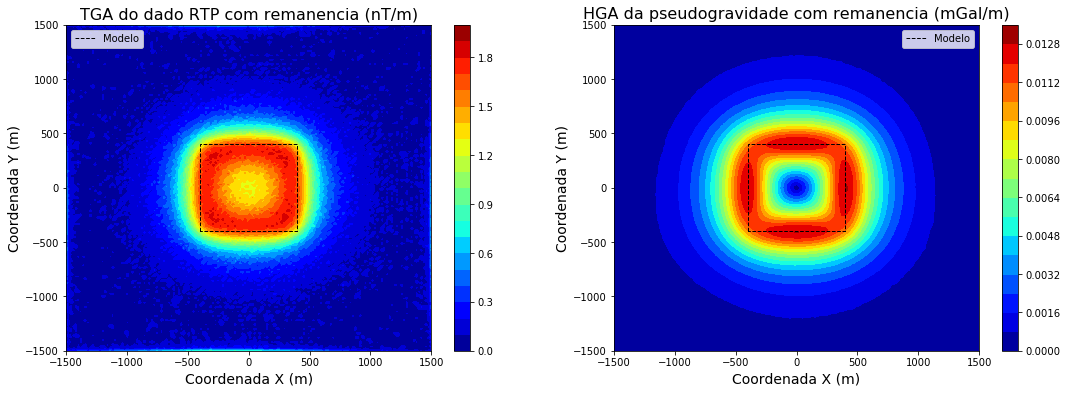

In [17]:
plt.close('all')
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.contourf(Y, X, tga_r, 15, cmap = plt.cm.jet)
draw_prism(area, 'k--', linewidth = 1, label = 'Modelo', xy2ne = True)
#plt.text(-1000., 1000., '(A)', fontsize = 16, bbox = dict(facecolor = 'white', alpha = 1))
plt.title('TGA do dado RTP com remanencia (nT/m)', fontsize = 16)
plt.xlabel('Coordenada X (m)', fontsize = 14)
plt.ylabel('Coordenada Y (m)', fontsize = 14)
plt.legend(loc = 2)
plt.colorbar()

plt.subplot(1, 2, 2)
plt.contourf(Y, X, hga_r, 15, cmap = plt.cm.jet)
draw_prism(area, 'k--', linewidth = 1, label = 'Modelo', xy2ne = True)
#plt.text(1000., 1000., '(B)', fontsize = 16, bbox = dict(facecolor = 'white', alpha = 1.))
plt.title('HGA da pseudogravidade com remanencia (mGal/m)', fontsize = 16)
plt.xlabel('Coordenada X (m)', fontsize = 14)
plt.ylabel('Coordenada Y (m)', fontsize = 14)
plt.legend(loc = 'best')
plt.colorbar()

plt.savefig('figures/tga_hga_1.png', dpi = 300)

plt.show()

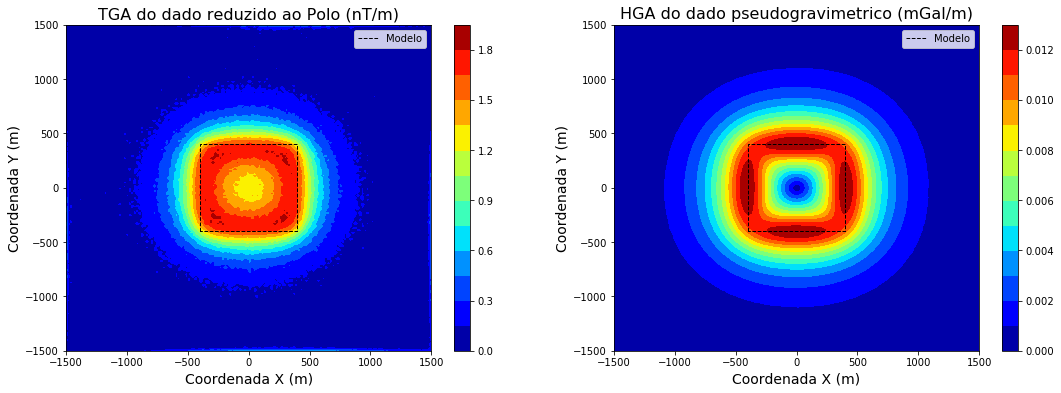

In [25]:
plt.close('all')
plt.figure(figsize=(18, 6))

plt.subplot(1, 2, 1)
plt.contourf(Y, X, tga_i, 15, cmap = plt.cm.jet)
draw_prism(area, 'k--', linewidth = 1, label = 'Modelo', xy2ne = True)
#plt.text(-1000., 1000., '(A)', fontsize = 16, bbox = dict(facecolor = 'white', alpha = 1))
plt.title('TGA do dado reduzido ao Polo (nT/m)', fontsize = 16)
plt.xlabel('Coordenada X (m)', fontsize = 14)
plt.ylabel('Coordenada Y (m)', fontsize = 14)
plt.legend(loc = 'upper right')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.contourf(Y, X, hga_i, 15, cmap = plt.cm.jet)
draw_prism(area, 'k--', linewidth = 1, label = 'Modelo', xy2ne = True)
#plt.text(1000., 1000., '(B)', fontsize = 16, bbox = dict(facecolor = 'white', alpha = 1.))
plt.title('HGA do dado pseudogravimetrico (mGal/m)', fontsize = 16)
plt.xlabel('Coordenada X (m)', fontsize = 14)
plt.ylabel('Coordenada Y (m)', fontsize = 14)
plt.legend(loc = 'upper right')
plt.colorbar()

plt.savefig('figures/tga_hga_2.png', dpi = 300)

plt.show()

### Cross correlation

In [19]:
# Create the intervals for inclination and declination
inc = np.arange(20., 91., 1.)
dec = np.arange(-100., 101., 1.)

ni, nd = inc.size, dec.size
# Create the grid
Dec, Inc = np.meshgrid(dec, inc)

# Create the array to allocate the result
res_rem = np.zeros([ni, nd])
res_ind = np.zeros([ni, nd])

In [20]:
from codes.statistical import cccoef

In [21]:
# Computing all result
for j in range(nd):
    for i in range(ni):    
        rtp_rem = reduction(x, y, tf_r, field, (inc[i], dec[j]), (90., 0.), (90., 0.))
        psg_rem = pseudograv(x, y, rtp_rem, (90., 0.), (90., 0.), 1000., 1.5)
        tga_rem = totalgrad(x, y, rtp_rem)
        hga_rem = horzgrad(x, y, psg_rem)
        res_rem[i,j] = cccoef(tga_rem, hga_rem)

In [24]:
# Computing all result
for j in range(nd):
    for i in range(ni):    
        rtp_ind = reduction(x, y, tf_i, field, (inc[i], dec[j]), (90., 0.), (90., 0.))
        psg_ind = pseudograv(x, y, rtp_ind, (90., 0.), (90., 0.), 1000., 1.5)
        tga_ind = totalgrad(x, y, rtp_ind)
        hga_ind = horzgrad(x, y, psg_ind)
        res_ind[i,j] = cccoef(tga_ind, hga_ind)

In [22]:
print 'Total gradient (RTP) and Horizontal gradient (Pseudogravity) - Remanent'
_ = analysis(res_rem)

Total gradient (RTP) and Horizontal gradient (Pseudogravity) - Remanent
Minimum:    0.7243
Maximum:    0.8953
Mean value: 0.8280
Variation:  0.1710


In [23]:
# Setting index values from maximum and minimum correlation
imax_r, jmax_r = np.where(res_rem == res_rem.max())
imin_r, jmin_r = np.where(res_rem == res_rem.min())
cc_inc_r = Inc[imax_r, jmax_r]
cc_dec_r = Dec[imax_r, jmax_r]
print 'Direcao para maxima e minima correlacao:'
print 'Inclination:', cc_inc_r
print 'Declination:', cc_dec_r

Direcao para maxima e minima correlacao:
Inclination: [ 26.]
Declination: [ 49.]


In [26]:
print 'Total gradient (RTP) and Horizontal gradient (Pseudogravity) - Induced'
_ = analysis(res_ind)

Total gradient (RTP) and Horizontal gradient (Pseudogravity) - Induced
Minimum:    0.8431
Maximum:    0.9072
Mean value: 0.8927
Variation:  0.0641


In [27]:
# Setting index values from maximum and minimum correlation
imax_i, jmax_i = np.where(res_ind == res_ind.max())
imin_i, jmin_i = np.where(res_ind == res_ind.min())
cc_inc_i = Inc[imax_i, jmax_i]
cc_dec_i = Dec[imax_i, jmax_i]
print 'Direcao para maxima e minima correlacao:'
print 'Inclination:', cc_inc_i
print 'Declination:', cc_dec_i

Direcao para maxima e minima correlacao:
Inclination: [ 69.]
Declination: [-32.]


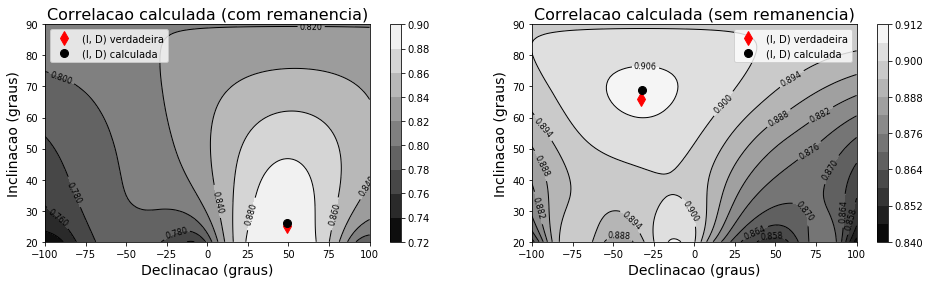

In [40]:
# Plotting the first result
plt.close('all')
plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
plot1 = plt.contour(Dec, Inc, res_rem, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec, Inc, res_rem, 10, cmap = plt.cm.gray)
plt.plot(source[1], source[0], 'rd', markersize = 10, label = '(I, D) verdadeira')
plt.plot(cc_dec_r, cc_inc_r, 'ko', markersize = 8, label = '(I, D) calculada')
plt.clabel(plot1, fontsize = 8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Correlacao calculada (com remanencia)', fontsize = 16)
plt.xlabel('Declinacao (graus)', fontsize = 14)
plt.ylabel('Inclinacao (graus)', fontsize = 14)
plt.colorbar()
plt.legend(loc = 'upper left')

plt.subplot(1, 2, 2)
plot2 = plt.contour(Dec, Inc, res_ind, 10, colors = 'k', linestyle = 'solid', linewidths = 1)
plt.contourf(Dec, Inc, res_ind, 10, cmap = plt.cm.gray)
plt.plot(field[1], field[0], 'rd', markersize = 10, label = '(I, D) verdadeira')
plt.plot(cc_dec_i, cc_inc_i, 'ko', markersize = 8, label = '(I, D) calculada')
plt.clabel(plot2, fontsize = 8)
plt.rcParams['contour.negative_linestyle'] = 'solid'
plt.title('Correlacao calculada (sem remanencia)', fontsize = 16)
plt.xlabel('Declinacao (graus)', fontsize = 14)
plt.ylabel('Inclinacao (graus)', fontsize = 14)
plt.colorbar()
plt.legend(loc = 'upper right')

plt.savefig('figures/tga_hga_final.png', dpi = 300)#, transparent = True)

plt.show()